```
Filtering in the Frequency Domain
@arashsm79
```
* [Calculating the fourier transform of a spatially trasformed image](#Calculating-the-fourier-transform-of-a-spatially-trasformed-image)
* [Analyzing the fourier transform of an image](#Analyzing-the-fourier-transform-of-an-image)
* [Remove salt and pepper noise in the frequency domain](#Remove-salt-and-pepper-noise-in-the-frequency-domain)
* [Fourier transform of a rotated image](#Fourier-transform-of-a-rotated-image)
* [Fourier transform of a translated image](#Fourier-transform-of-a-translated-image)
* [Edge detection using band reject filters](#Edge-detection-using-band-reject-filters)
* [Smoothing using band reject filters](#Smoothing-using-band-reject-filters)

In [89]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import random as rnd
from PIL import Image, ImageOps

# Helper Functions

In [90]:
def fft(img):
    img = np.fft.fft2(img)
    img = np.fft.fftshift(img)
    return img

In [91]:
def ifft(img):
    ift = np.fft.ifftshift(img)
    ift = np.fft.ifft2(ift)
    return ift.real

In [93]:
# show the image with a better size
def show_image_actual_size(img, cmap=None, dpi=100):
    dpi = dpi
    height, width = img.shape[0], img.shape[1]
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(img, cmap=cmap)
    plt.show()

In [94]:
def log(x):
    return np.log(x, where=0<x, out=np.zeros_like(x))

In [95]:
def oddify(img):
    img_size = min(img.shape) - 1 + min(img.shape) % 2
    return img[:img_size, :img_size]

## Calculating the fourier transform of a spatially trasformed image

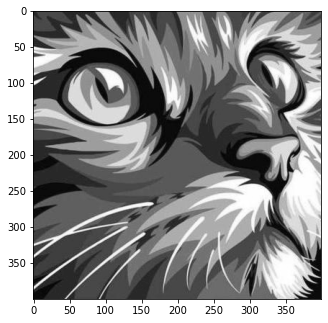

In [96]:
# Load the image as a numpy array
e1img = ImageOps.grayscale(Image.open("cat.jpg"))
e1img = np.array(e1img)
show_image_actual_size(e1img, cmap='gray')

In [97]:
e1img.shape

(400, 400)

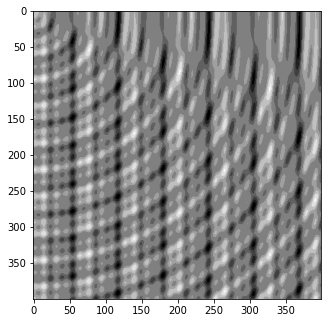

In [98]:
e1img_trans = np.zeros((e1img.shape[0], e1img.shape[1]), dtype=int)
s = math.sin
c = math.cos
for y in range(e1img.shape[0]):
    for x in range(e1img.shape[1]):
        e1img_trans[y][x] = s(0.1*x) + s(0.2*x) + c(0.4*x) + \
        s(math.sqrt(x**2 + y**2)*0.15) + s(math.sqrt(x**2 + y**2)*0.35)
show_image_actual_size(e1img_trans, cmap='gray')

In [99]:
e1img_trans = oddify(e1img_trans)
e1img_trans.shape

(399, 399)

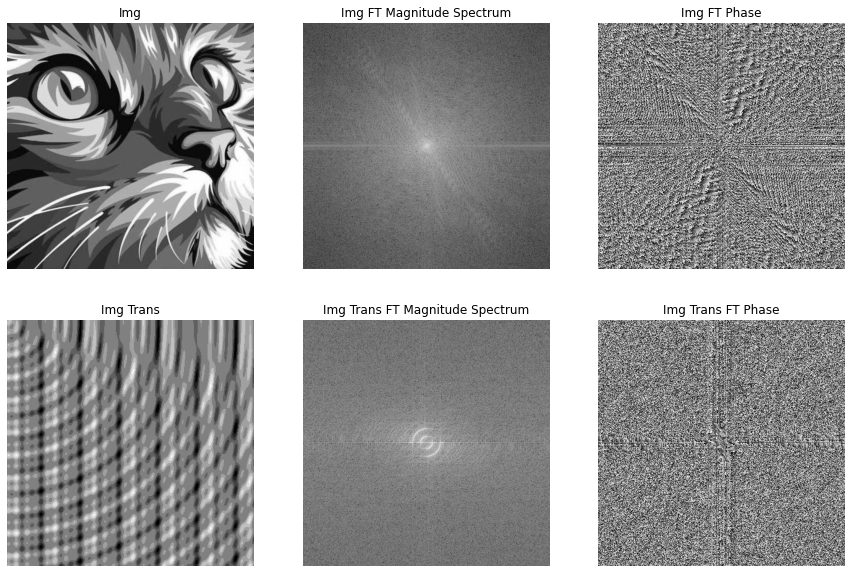

In [100]:
# original image
e1img_ft = fft(e1img)
plt.figure(figsize=(15, 10))
plt.set_cmap("gray")
plt.subplot(2, 3, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e1img)
plt.subplot(2, 3, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e1img_ft)))
plt.subplot(2, 3, 3)
plt.axis("off")
plt.title("Img FT Phase")
plt.imshow(np.angle(e1img_ft))

# transformed image
e1img_trans_ft = fft(e1img_trans)
plt.set_cmap("gray")
plt.subplot(2, 3, 4)
plt.axis("off")
plt.title("Img Trans")
plt.imshow(e1img_trans)
plt.subplot(2, 3, 5)
plt.axis("off")
plt.title("Img Trans FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e1img_trans_ft)))
plt.subplot(2, 3, 6)
plt.axis("off")
plt.title("Img Trans FT Phase")
plt.imshow(np.angle(e1img_trans_ft))

The spectrum of the image has been transformed into two concentric circles.

## Analyzing the fourier transform of an image


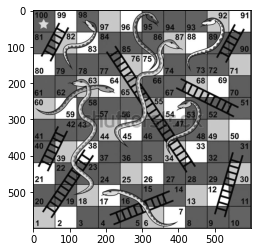

In [101]:
# Load the image as a numpy array
e2img = ImageOps.grayscale(Image.open("snake.jpg"))
e2img = np.array(e2img)
plt.imshow(e2img, cmap='gray')

In [102]:
e2img.shape

(599, 600)

In [103]:
e2img = oddify(e2img)
e2img.shape

(599, 599)

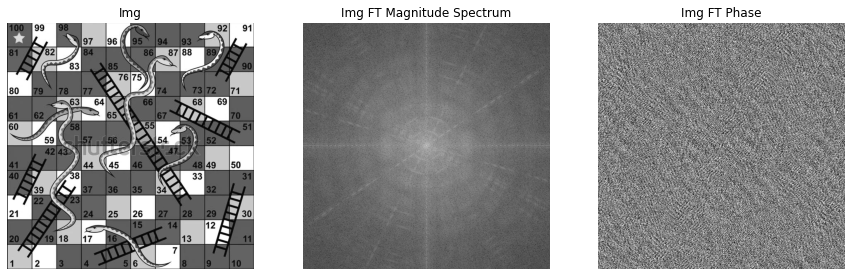

In [104]:
e2img_ft = fft(e2img)
plt.figure(figsize=(15, 10))
plt.set_cmap("gray")
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e2img)
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e2img_ft)))
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Img FT Phase")
plt.imshow(np.angle(e2img_ft))

* The lines in the spectrum of perpendicular to the direction of ladders and snakes
* The are two perpendicular bright lines passing through the center. These two lines represent the lines of the checkerboard.
To see this, we can remove the two perpendicular lines at the center. After reconstructing the image using inverse ft, we can see that the checkerboard is basically gone and only ladders and snakes are left. 

In [105]:
tmp = e2img_ft[290:310, 290:310].copy()
e2img_ft[:, 290:310] = 1
e2img_ft[290:310, :] = 1
e2img_ft[290:310, 290:310] = 2000

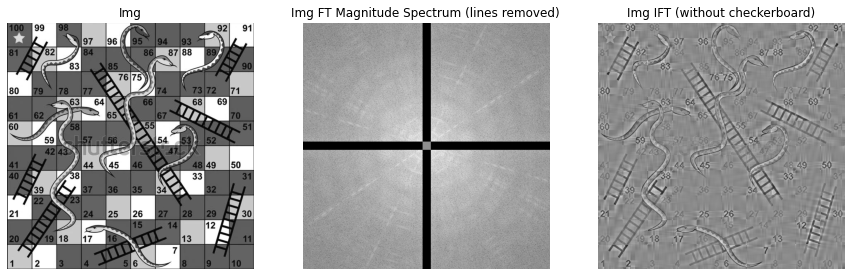

In [106]:
plt.figure(figsize=(15, 10))
plt.set_cmap("gray")
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e2img)
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum (lines removed)")
plt.imshow(np.log(np.abs(e2img_ft)))
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Img IFT (without checkerboard)")
plt.imshow(ifft(e2img_ft))

## Remove salt and pepper noise in the frequency domain


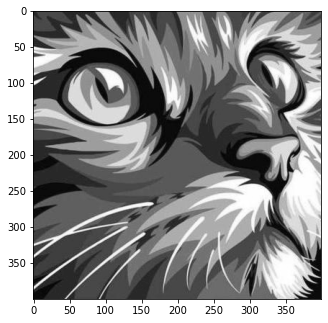

In [107]:
# Load the image as a numpy array
e3img = ImageOps.grayscale(Image.open("cat.jpg"))
e3img = np.array(e3img)
show_image_actual_size(e3img, cmap='gray')

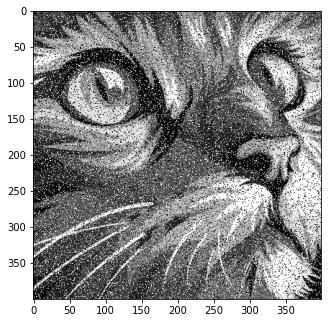

In [108]:
# Noice percentage
chance = 20
e3img_noisy = e3img.copy()
for i in range(e3img_noisy.shape[0]):
    for j in range(e3img_noisy.shape[1]):
        if rnd.randint(1, 100) <= chance:
            # e3img_noisy[i][j] = rnd.randint(0, 255)
            if rnd.randint(1, 100) <= 50:
                e3img_noisy[i][j] = 0
            else:
                e3img_noisy[i][j] = 255
                
show_image_actual_size(e3img_noisy, cmap='gray')

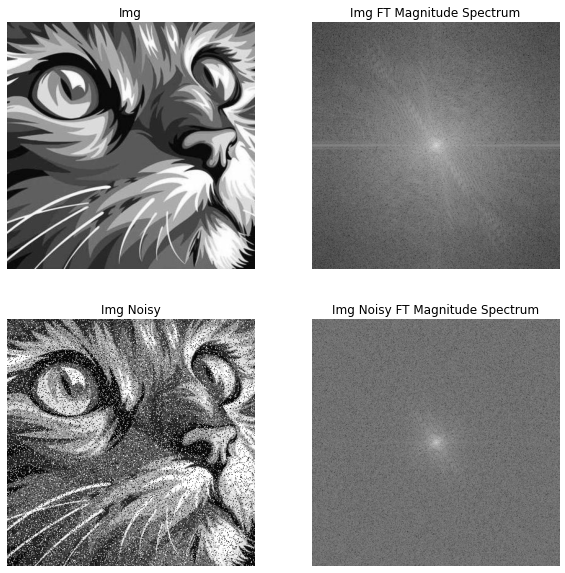

In [109]:
# original image
e3img_ft = fft(e3img)
plt.figure(figsize=(10, 10))
plt.set_cmap("gray")
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e3img)
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e3img_ft)))


# transformed image
e3img_noisy_ft = fft(e3img_noisy)
plt.set_cmap("gray")
plt.subplot(2, 2, 3)
plt.axis("off")
plt.title("Img Noisy")
plt.imshow(e3img_noisy)
plt.subplot(2, 2, 4)
plt.axis("off")
plt.title("Img Noisy FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e3img_noisy_ft)))

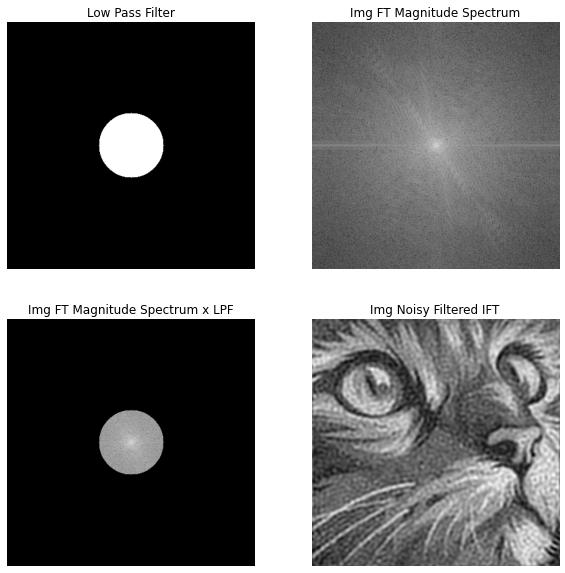

In [110]:
# create low pass filter
radius = 52
mask = np.zeros_like(e3img_noisy)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, 1, -1)
#mask = cv2.GaussianBlur(mask, (19,19), 0)

e3img_noisy_filtered_spectrum = np.multiply(e3img_noisy_ft, mask)
e3img_noisy_filtered = ifft(e3img_noisy_filtered_spectrum)


plt.figure(figsize=(10, 10))
plt.set_cmap("gray")
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Low Pass Filter")
plt.imshow(mask)
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e3img_ft)))


plt.set_cmap("gray")
plt.subplot(2, 2, 3)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum x LPF")
plt.imshow(log(np.abs(e3img_noisy_filtered_spectrum)))
plt.subplot(2, 2, 4)
plt.axis("off")
plt.title("Img Noisy Filtered IFT")
plt.imshow(e3img_noisy_filtered)

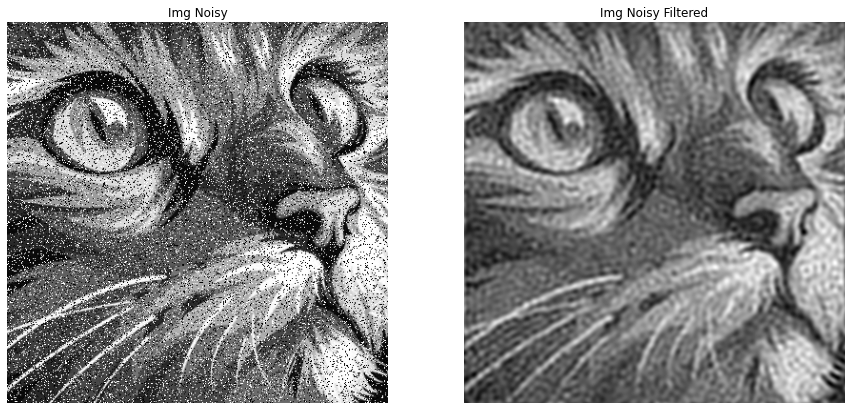

In [111]:
plt.figure(figsize=(15, 10))
plt.set_cmap("gray")
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Img Noisy")
plt.imshow(e3img_noisy)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Img Noisy Filtered")
plt.imshow(e3img_noisy_filtered)

## Fourier transform of a rotated image


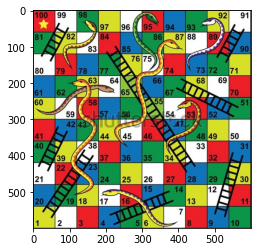

In [112]:
# Load the image as a numpy array
e4img = Image.open("snake.jpg")
e4img = np.array(e4img)
plt.imshow(e4img)

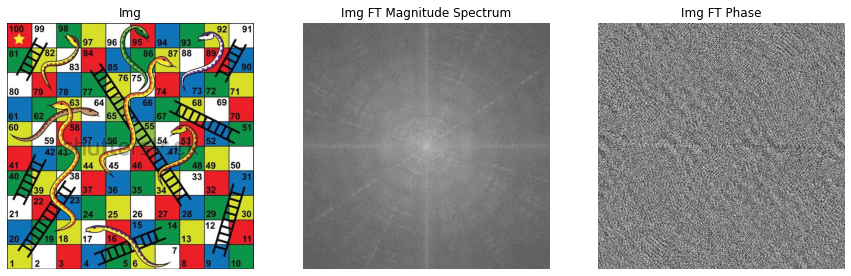

In [113]:
e4img_ft = fft(e4img.mean(axis=2))
plt.figure(figsize=(15, 10))
plt.set_cmap("gray")
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e4img)
plt.subplot(1, 3, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(log(np.abs(e4img_ft)))
plt.subplot(1, 3, 3)
plt.axis("off")
plt.title("Img FT Phase")
plt.imshow(np.angle(e4img_ft))

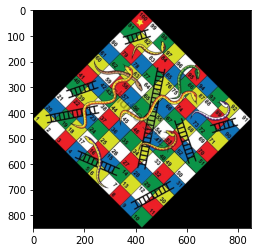

In [114]:
angle = math.pi / 4

T = np.array([
             [math.cos(angle), math.sin(angle)],
             [-math.sin(angle), math.cos(angle)]
             ])

T_inv = np.linalg.inv(T)

e4img_trans_height = round(abs(e4img.shape[0]*math.cos(
    angle)+abs(e4img.shape[1]*math.sin(angle))))+1
e4img_trans_width = round(abs(e4img.shape[1]*math.cos(
    angle)+abs(e4img.shape[0]*math.sin(angle))))+1

e4img_trans__center_h = round(((e4img_trans_height+1)/2)-1)
e4img_trans__center_w = round(((e4img_trans_width+1)/2)-1)

e4img_trans = np.zeros(
    (e4img_trans_height, e4img_trans_width, e4img.shape[2]), dtype=int)

def nearest_neighbors_interpolation(i, j, M, T_inv):
    x, y = T_inv @ np.array([i, j])
    center_height = round(((M.shape[0]+1)/2)-1)
    center_width = round(((M.shape[1]+1)/2)-1)
    x = center_height - int(x)
    y = center_width - int(y)
    if x >  M.shape[0] - 1 or y > M.shape[1] - 1 or x < 0 or y < 0:
        return 0
    return M[x, y, ]


for i in range(e4img_trans.shape[0]):
    for j in range(e4img_trans.shape[1]):
        x = e4img_trans.shape[0]-e4img_trans__center_h-i-1
        y = e4img_trans.shape[1]-e4img_trans__center_w-j-1
        e4img_trans[i, j, :] = nearest_neighbors_interpolation(x, y, e4img, T_inv)

plt.imshow(e4img_trans)

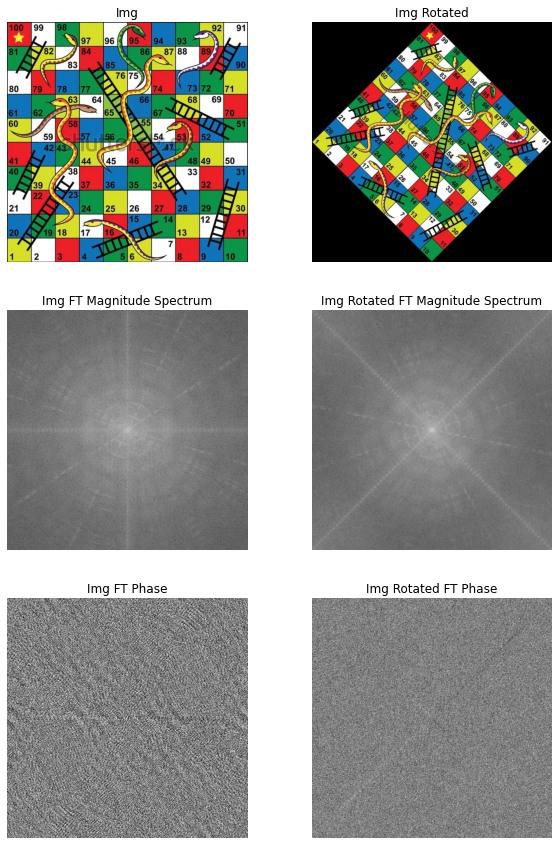

In [115]:
plt.figure(figsize=(10, 15))
plt.set_cmap("gray")
plt.subplot(3, 2, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e4img)
plt.subplot(3, 2, 2)
plt.axis("off")
plt.title("Img Rotated")
plt.imshow(e4img_trans)

e4img_ft = fft(e4img.mean(axis=2))
e4img_trans_ft = fft(e4img_trans.mean(axis=2))

plt.set_cmap("gray")
plt.subplot(3, 2, 3)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(log(np.abs(e4img_ft)))
plt.subplot(3, 2, 4)
plt.axis("off")
plt.title("Img Rotated FT Magnitude Spectrum")
plt.imshow(log(np.abs(e4img_trans_ft)))

plt.set_cmap("gray")
plt.subplot(3, 2, 5)
plt.axis("off")
plt.title("Img FT Phase")
plt.imshow(np.angle(e4img_ft))
plt.subplot(3, 2, 6)
plt.axis("off")
plt.title("Img Rotated FT Phase")
plt.imshow(np.angle(e4img_trans_ft))

If we rotate the image by 45 degrees, the fourier transform spectrum of the image is also rotated by 45 degreees.
Both magnitude and phase have changed.

## Fourier transform of a translated image


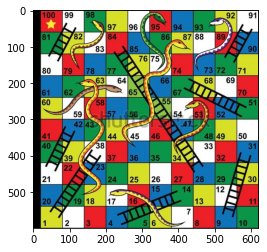

In [116]:
e4img_moved = np.zeros((e4img.shape[0], e4img.shape[1] + 20, e4img.shape[2]), dtype=int)


for i in range(e4img.shape[0]):
    for j in range(e4img.shape[1]):
        e4img_moved[i, j + 20, :] = e4img[i, j, :] 

plt.imshow(e4img_moved)

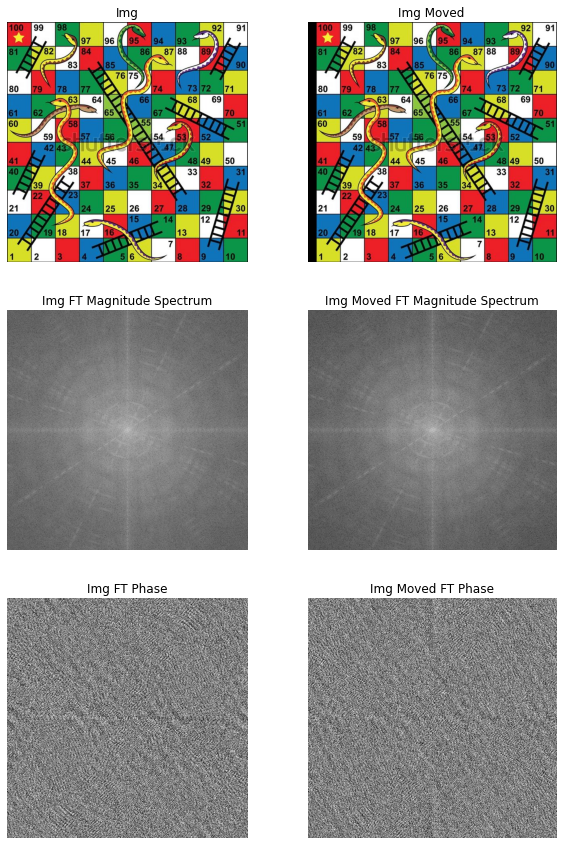

In [117]:
plt.figure(figsize=(10, 15))
plt.set_cmap("gray")
plt.subplot(3, 2, 1)
plt.axis("off")
plt.title("Img")
plt.imshow(e4img)
plt.subplot(3, 2, 2)
plt.axis("off")
plt.title("Img Moved")
plt.imshow(e4img_moved)

e4img_ft = fft(e4img.mean(axis=2))
e4img_moved_ft = fft(e4img_moved.mean(axis=2))

plt.set_cmap("gray")
plt.subplot(3, 2, 3)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(log(np.abs(e4img_ft)))
plt.subplot(3, 2, 4)
plt.axis("off")
plt.title("Img Moved FT Magnitude Spectrum")
plt.imshow(log(np.abs(e4img_moved_ft)))

plt.set_cmap("gray")
plt.subplot(3, 2, 5)
plt.axis("off")
plt.title("Img FT Phase")
plt.imshow(np.angle(e4img_ft))
plt.subplot(3, 2, 6)
plt.axis("off")
plt.title("Img Moved FT Phase")
plt.imshow(np.angle(e4img_moved_ft))

The magnitude doesnt change much, but the phase has changed a lot.

## Edge detection using band reject filters

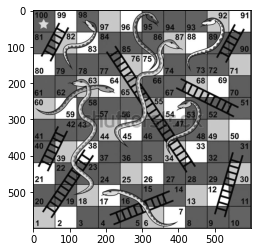

In [118]:
# Load the image as a numpy array
e5img = ImageOps.grayscale(Image.open("snake.jpg"))
e5img = np.array(e5img)
plt.imshow(e5img)

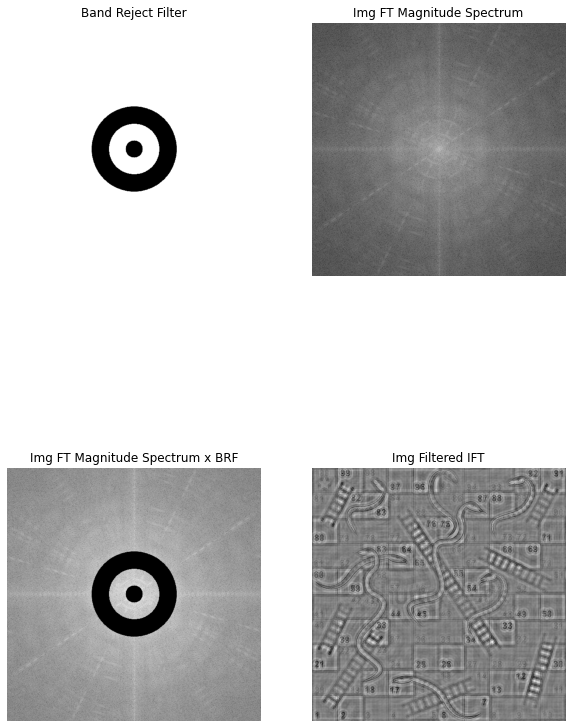

In [119]:
radius = 80
mask = np.zeros_like(e5img)
mask.fill(1)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, 0, 40)

mask2 = np.zeros_like(e5img)
mask2.fill(1)
cy = mask2.shape[0] // 2
cx = mask2.shape[1] // 2
cv2.circle(mask2, (cx,cy), 20, 0, -1)

mask = np.multiply(mask, mask2)
#mask = cv2.GaussianBlur(mask, (19,19), 0)

e5img_ft = fft(e5img)
e5img_filtered_fft = np.multiply(e5img_ft, mask)
e5img_filtered = ifft(e5img_filtered_fft)

plt.figure(figsize=(10, 15))
plt.set_cmap("gray")
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Band Reject Filter")
plt.imshow(mask)
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e5img_ft)))


plt.set_cmap("gray")
plt.subplot(2, 2, 3)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum x BRF")
plt.imshow(log(np.abs(e5img_filtered_fft)))
plt.subplot(2, 2, 4)
plt.axis("off")
plt.title("Img Filtered IFT")
plt.imshow(e5img_filtered)

## Smoothing using band reject filters

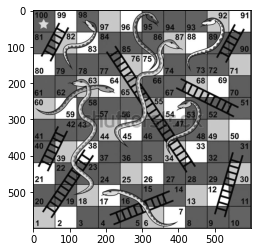

In [120]:
# Load the image as a numpy array
e6img = ImageOps.grayscale(Image.open("snake.jpg"))
e6img = np.array(e6img)
plt.imshow(e6img)

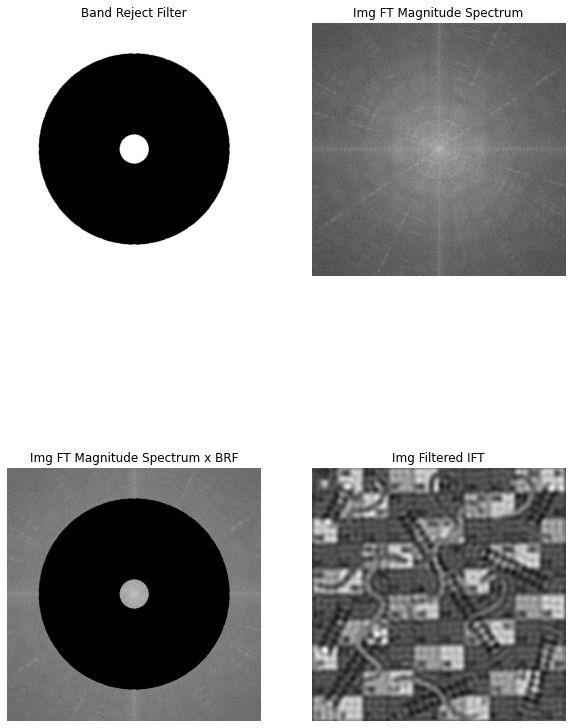

In [121]:
radius = 130
mask = np.zeros_like(e6img)
mask.fill(1)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, 0, 190)


e6img_ft = fft(e6img)
e6img_filtered_fft = np.multiply(e6img_ft, mask)
e6img_filtered = ifft(e6img_filtered_fft)

plt.figure(figsize=(10, 15))
plt.set_cmap("gray")
plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Band Reject Filter")
plt.imshow(mask)
plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum")
plt.imshow(np.log(np.abs(e6img_ft)))


plt.set_cmap("gray")
plt.subplot(2, 2, 3)
plt.axis("off")
plt.title("Img FT Magnitude Spectrum x BRF")
plt.imshow(log(np.abs(e6img_filtered_fft)))
plt.subplot(2, 2, 4)
plt.axis("off")
plt.title("Img Filtered IFT")
plt.imshow(e6img_filtered)